In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("sales data-set.csv")
features = pd.read_csv("Features data set.csv")
stores = pd.read_csv("stores data-set.csv")
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape,"\nColumns:",sales.columns.tolist(),"\n=============")
print("Features Total Col.",len(features.columns),"\nShape:", features.shape, "\nColumns:",features.columns.tolist(),"\n=============")
print("Stores Total Col.",len(stores.columns),"\nShape:",stores.shape, "\nColumns:",stores.columns.tolist())

def insight(df):
    print("--------------------")
    print(df.head())
    

insight(sales)
insight(features)
insight(stores)

Sales Total Col. 5 
Shape: (421570, 5) 
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'] 
Features Total Col. 12 
Shape: (8190, 12) 
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 
Stores Total Col. 3 
Shape: (45, 3) 
Columns: ['Store', 'Type', 'Size']
--------------------
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
--------------------
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        Na

In [3]:
final = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])

In [4]:
final = final.merge(stores, how= "left", on=['Store'])
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
print("Final Dataset Col:",len(final.columns),"\nShape: ",final.shape,"\nColumns",final.columns.tolist())

Final Dataset Col: 16 
Shape:  (421570, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


In [6]:
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
null values{%},0,0,0,0,0,0,0,64.2572,73.611,67.4808,67.9847,64.079,0,0,0,0


In [7]:
final.fillna(-9999, inplace=True)
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values{%},0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
print("Duplicate Values : ",final.duplicated().sum())

Duplicate Values :  0


In [9]:
final = final.applymap(lambda x: 1 if x ==  True  else x)
final = final.applymap(lambda x: 0 if x ==  False  else x)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,211.350143,8.106,A,151315


           Date  Weekly_Sales
112  24/12/2010   80931415.60
107  23/12/2011   76998241.31
117  25/11/2011   66593605.26
122  26/11/2010   65821003.24
79   17/12/2010   61820799.85
74   16/12/2011   60085695.94
46   10/12/2010   55666770.39
41   09/12/2011   55561147.70
25   06/04/2012   53502315.87
27   06/07/2012   51253021.88


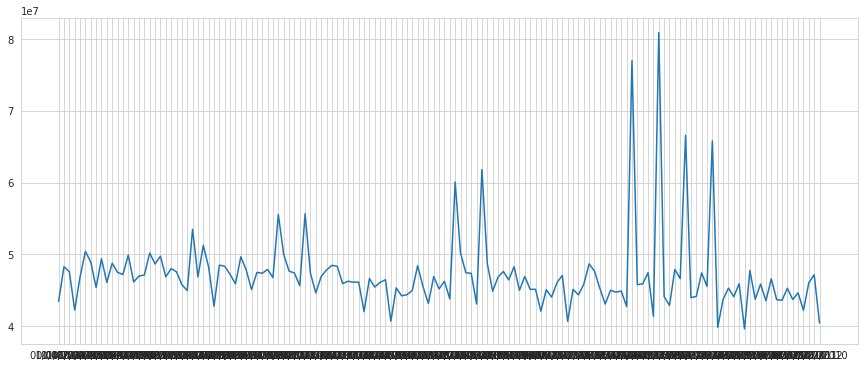

In [10]:
#Average Sales for all store/department for Week

df_average_sales_week = final.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

print(df_average_sales[:10])

#Seasonality vs Trend Analysis
plt.figure(figsize=(15,6))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

   IsHoliday  Weekly_Sales
0          0  6.231919e+09
1          1  5.052996e+08


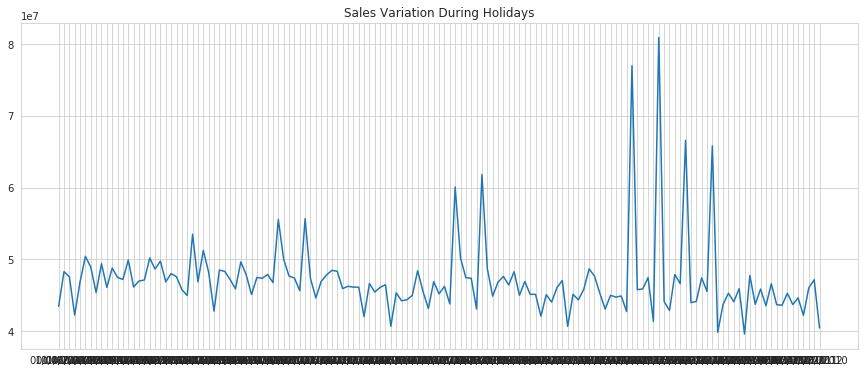

In [11]:
#Sales variation during Holidays(Store/Dept)
holiday =  final[['Date', 'IsHoliday', 'Weekly_Sales']].copy()
holiday =  holiday.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
holiday_group =  holiday.groupby(by=['IsHoliday'], as_index=False)['Weekly_Sales'].sum()
print( holiday_group)
#print( holiday[:5])

def holiday_sales(df):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,6))
    labels = ['Date', 'IsHoliday_x', 'Weekly_Sales']
    plt.title('Sales Variation During Holidays')
    plt.plot(df.Date, df.Weekly_Sales)
    plt.show()
    
holiday_sales(holiday)

In [12]:
final['Return'] = (final['Weekly_Sales'] < 0).astype('int')
final_group = final.groupby(['Return'], as_index = False)['Weekly_Sales'].sum() 
final_group

,Return,Weekly_Sales
0,0,6.737307e+09
1,1,-8.816156e+04


In [13]:
#Making Avg MarkDown
final['AvgMarkDown'] = final['MarkDown1'] + final['MarkDown2'] + final['MarkDown3'] + final['MarkDown4'] + final['MarkDown5']
final['AvgMarkDown'] = final['AvgMarkDown'] / 5
final.AvgMarkDown[378:385]

378     5134.336
379     2559.290
380    11375.348
381     5931.116
382     4573.182
383     1932.570
384     1232.974
Name: AvgMarkDown, dtype: float64

In [14]:
#Creating Weekly sales in a 4 range

final['cum_sum'] = final.Weekly_Sales.cumsum()
final['cum_perc'] = 100*final.cum_sum/final.Weekly_Sales.sum()

final['rangeA'] = 0
final['rangeA'][final['cum_perc'] <= 25] = 1

final['rangeB'] = 0
final['rangeB'][(final['cum_perc'] > 25) & (final['cum_perc'] <= 50)] = 1

final['rangeC'] = 0
final['rangeC'][(final['cum_perc'] > 50) & (final['cum_perc'] <= 75)] = 1

final['rangeD'] = 0
final['rangeD'][final['cum_perc'] > 75] = 1

final = final.drop(['cum_perc', 'cum_sum'], 1)

final.head(100)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Return,AvgMarkDown,rangeA,rangeB,rangeC,rangeD
0,1,1,05/02/2010,24924.50,0,42.31,2.572,-9999.00,-9999.00,-9999.00,...,211.096358,8.106,A,151315,0,-9999.000,1,0,0,0
1,1,1,12/02/2010,46039.49,1,38.51,2.548,-9999.00,-9999.00,-9999.00,...,211.242170,8.106,A,151315,0,-9999.000,1,0,0,0
2,1,1,19/02/2010,41595.55,0,39.93,2.514,-9999.00,-9999.00,-9999.00,...,211.289143,8.106,A,151315,0,-9999.000,1,0,0,0
3,1,1,26/02/2010,19403.54,0,46.63,2.561,-9999.00,-9999.00,-9999.00,...,211.319643,8.106,A,151315,0,-9999.000,1,0,0,0
4,1,1,05/03/2010,21827.90,0,46.50,2.625,-9999.00,-9999.00,-9999.00,...,211.350143,8.106,A,151315,0,-9999.000,1,0,0,0
5,1,1,12/03/2010,21043.39,0,57.79,2.667,-9999.00,-9999.00,-9999.00,...,211.380643,8.106,A,151315,0,-9999.000,1,0,0,0
6,1,1,19/03/2010,22136.64,0,54.58,2.720,-9999.00,-9999.00,-9999.00,...,211.215635,8.106,A,151315,0,-9999.000,1,0,0,0
7,1,1,26/03/2010,26229.21,0,51.45,2.732,-9999.00,-9999.00,-9999.00,...,211.018042,8.106,A,151315,0,-9999.000,1,0,0,0
8,1,1,02/04/2010,57258.43,0,62.27,2.719,-9999.00,-9999.00,-9999.00,...,210.820450,7.808,A,151315,0,-9999.000,1,0,0,0
9,1,1,09/04/2010,42960.91,0,65.86,2.770,-9999.00,-9999.00,-9999.00,...,210.622857,7.808,A,151315,0,-9999.000,1,0,0,0


In [15]:
#Aggregate the Top performing stores interms of sales
top_stores = final.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
top_stores

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [16]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'AvgMarkDown', 'rangeA', 
                  'rangeB', 'rangeC', 'rangeD', 'Return']].copy()
clm.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,AvgMarkDown,rangeA,rangeB,rangeC,rangeD,Return
Weekly_Sales,1.000000,-0.002312,-0.000120,-0.020921,-0.025864,0.243828,0.033450,0.030098,0.041885,0.040800,0.030893,0.041876,0.030899,0.042184,0.011996,-0.078035,-0.039076
Temperature,-0.002312,1.000000,0.143859,0.182112,0.096730,-0.058313,-0.023022,-0.167249,-0.061655,-0.057157,-0.015049,-0.074268,0.146173,-0.122620,-0.093847,0.064937,-0.000408
Fuel_Price,-0.000120,0.143859,1.000000,-0.164210,-0.033853,0.003361,0.427581,0.211915,0.288307,0.380233,0.411167,0.413472,-0.123035,0.055708,0.102799,-0.033664,0.005459
CPI,-0.020921,0.182112,-0.164210,1.000000,-0.299953,-0.003314,0.040587,0.030209,0.035079,0.037474,0.077950,0.052692,0.358054,-0.192377,-0.161769,-0.002916,-0.004713
Unemployment,-0.025864,0.096730,-0.033853,-0.299953,1.000000,-0.068238,-0.176959,-0.129358,-0.137208,-0.183051,-0.201196,-0.197379,-0.266233,0.053173,0.084719,0.117235,0.002055
Size,0.243828,-0.058313,0.003361,-0.003314,-0.068238,1.000000,0.107314,0.109573,0.058181,0.148591,0.079007,0.119014,-0.025250,0.143315,0.102413,-0.202991,-0.006422
MarkDown1,0.033450,-0.023022,0.427581,0.040587,-0.176959,0.107314,1.000000,0.577081,0.538528,0.935263,0.800217,0.926607,-0.003652,0.032053,0.024799,-0.049005,0.000758
MarkDown2,0.030098,-0.167249,0.211915,0.030209,-0.129358,0.109573,0.577081,1.000000,0.411877,0.572866,0.568744,0.741032,0.011335,0.038232,0.019497,-0.063457,0.002262
MarkDown3,0.041885,-0.061655,0.288307,0.035079,-0.137208,0.058181,0.538528,0.411877,1.000000,0.529636,0.580903,0.724293,0.008443,0.018178,0.007212,-0.031056,-0.001268
MarkDown4,0.040800,-0.057157,0.380233,0.037474,-0.183051,0.148591,0.935263,0.572866,0.529636,1.000000,0.762356,0.910057,0.020905,0.047722,0.033903,-0.094365,0.000402


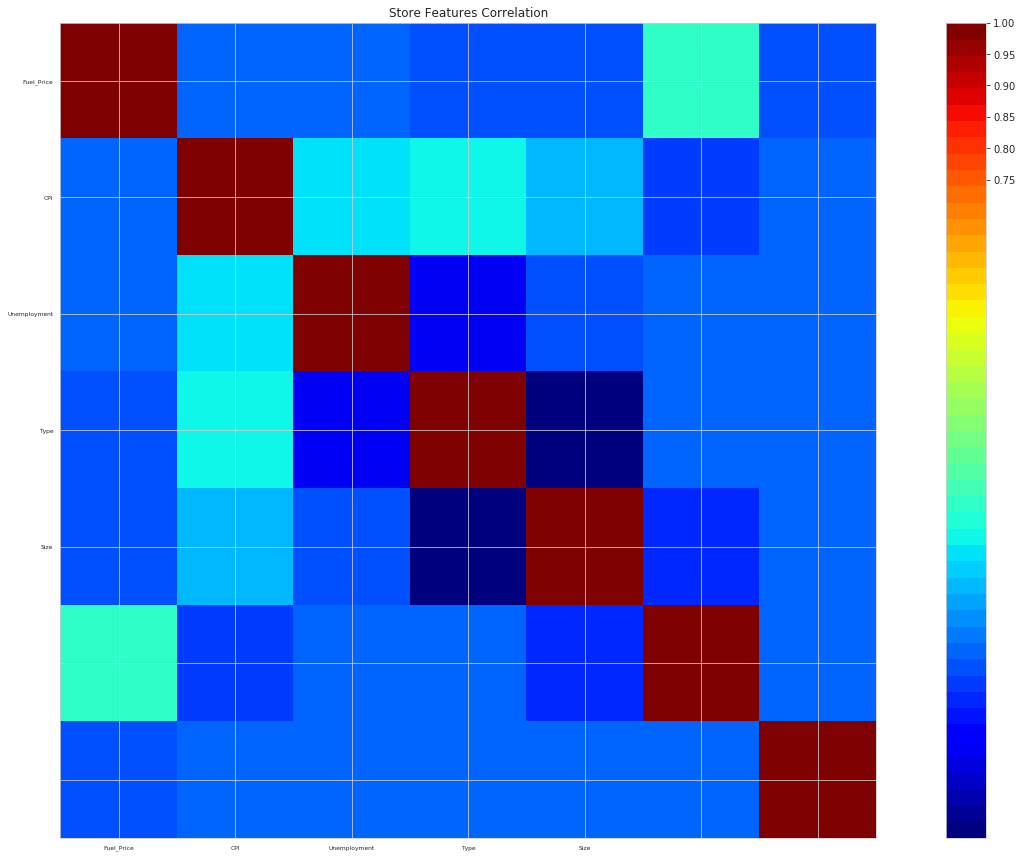

In [17]:
clm = final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size',
                   'Return']].copy()
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
    fig = plt.figure(figsize = (25,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Store Features Correlation')
    labels=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size']
    ax1.set_xticklabels(labels, fontsize=6)
    ax1.set_yticklabels(labels, fontsize=6)
    #Add colorbar to make sure to specify a tick location to match desired tick labels
    fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])
    plt.show()
    
correlation_matrix(clm)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')


#Dropping the 'Label' from  and assigning to X
X = np.array(final.drop(['Weekly_Sales', 'Date', 'Type', 'MarkDown1', 'MarkDown4'], 1))
X = preprocessing.scale(X)


final.dropna(inplace=True)
Y = np.array(final['Weekly_Sales'])


X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2)

list1 = [X_train, X_test, Y_train, Y_test]
for i in list1:
    print(i.shape)
# Training Model

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)

print(accuracy)

ImportError: cannot import name 'cross_validation' from 'sklearn' (/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/__init__.py)